In [1]:
from utils import extract_from_mnist, visualize_data
from train import prep_data,create_model,training_loop,eval_test,eval_train, plot_losses,visualize_weights_and_signs
from adv_attack import adv_attack,create_adv_test

# 1\ Logistic regression

### Data Extraction

In [2]:
filtered_data = extract_from_mnist() # to extract the 3s and 7s from the MNIST dataset

Filtered dataset shape: (14434, 785)
Labels: 0        3
1        3
2        3
3        7
4        3
        ..
14429    3
14430    7
14431    3
14432    7
14433    3
Name: target, Length: 14434, dtype: int64


### Quick visualization

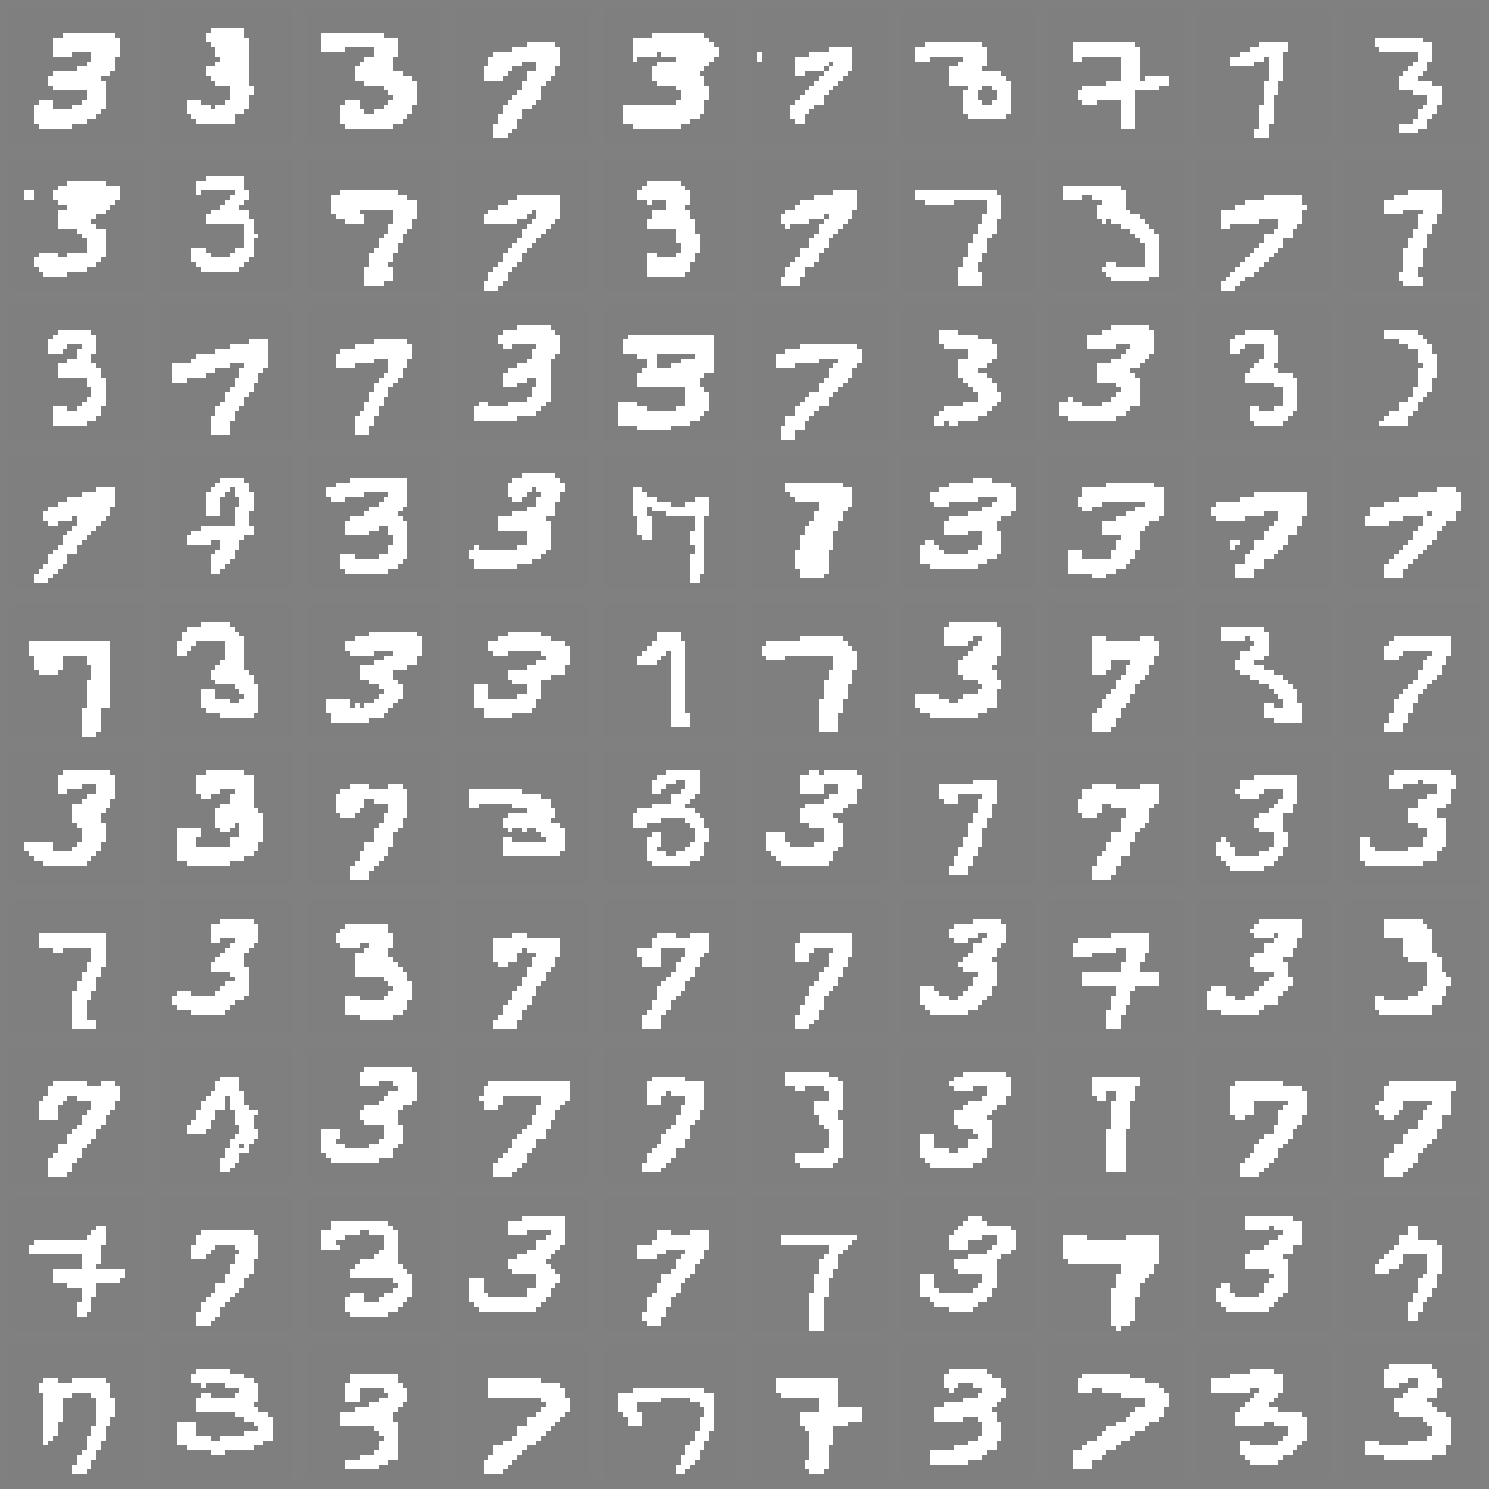

In [12]:
num_rows = 10
num_cols = 10
visualize_data(num_rows,num_cols,filtered_data) # to visualize the data

### Data preparation and model creation

In [4]:
X_train_tensor,y_train_tensor,X_val,y_val,X_test_tensor,y_test_tensor,num_classes= prep_data(filtered_data)
# to prepare the data for the training

Unique classes in target labels: 2


In [5]:
model,criterion, optimizer =create_model(X_train_tensor,num_classes,lr = 0.005)
# to create the linear model and get the criterion and optimizer


### Training Loop and performance 

In [7]:
training_loss ,model_trained = training_loop(optimizer, model, criterion, X_train_tensor, y_train_tensor,X_val,y_val,num_epoch=120,batch_size=64)
# to train the model

Epoch [1/120], Training Loss: 0.0638, Validation Loss: 0.0721
Epoch [2/120], Training Loss: 0.0188, Validation Loss: 0.0611
Epoch [3/120], Training Loss: 0.3346, Validation Loss: 0.0549
Epoch [4/120], Training Loss: 0.0493, Validation Loss: 0.0501
Epoch [5/120], Training Loss: 0.0430, Validation Loss: 0.0466
Epoch [6/120], Training Loss: 0.0226, Validation Loss: 0.0461
Epoch [7/120], Training Loss: 0.1255, Validation Loss: 0.0428
Epoch [8/120], Training Loss: 0.0786, Validation Loss: 0.0429
Epoch [9/120], Training Loss: 0.1718, Validation Loss: 0.0400
Epoch [10/120], Training Loss: 0.0315, Validation Loss: 0.0406
Epoch [11/120], Training Loss: 0.0105, Validation Loss: 0.0384
Epoch [12/120], Training Loss: 0.0255, Validation Loss: 0.0383
Epoch [13/120], Training Loss: 0.0147, Validation Loss: 0.0381
Epoch [14/120], Training Loss: 0.0080, Validation Loss: 0.0373
Epoch [15/120], Training Loss: 0.0086, Validation Loss: 0.0365
Epoch [16/120], Training Loss: 0.0072, Validation Loss: 0.0358
E

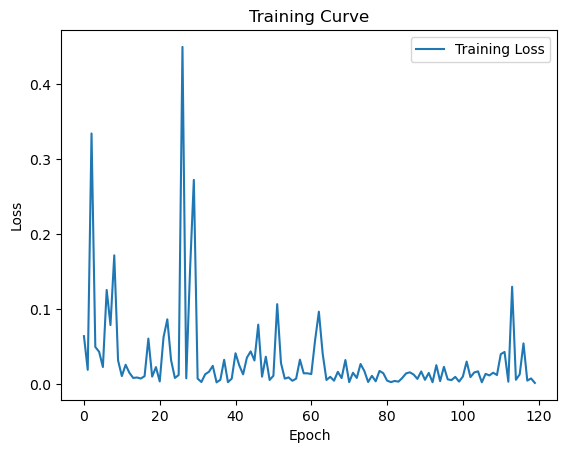

In [8]:
plot_losses(training_loss) # to plot the training loss

In [9]:
eval_train(X_train_tensor,y_train_tensor,model_trained) # to evaluate the model on the training set

Training Accuracy: 99.22%


### Weight Visualisation

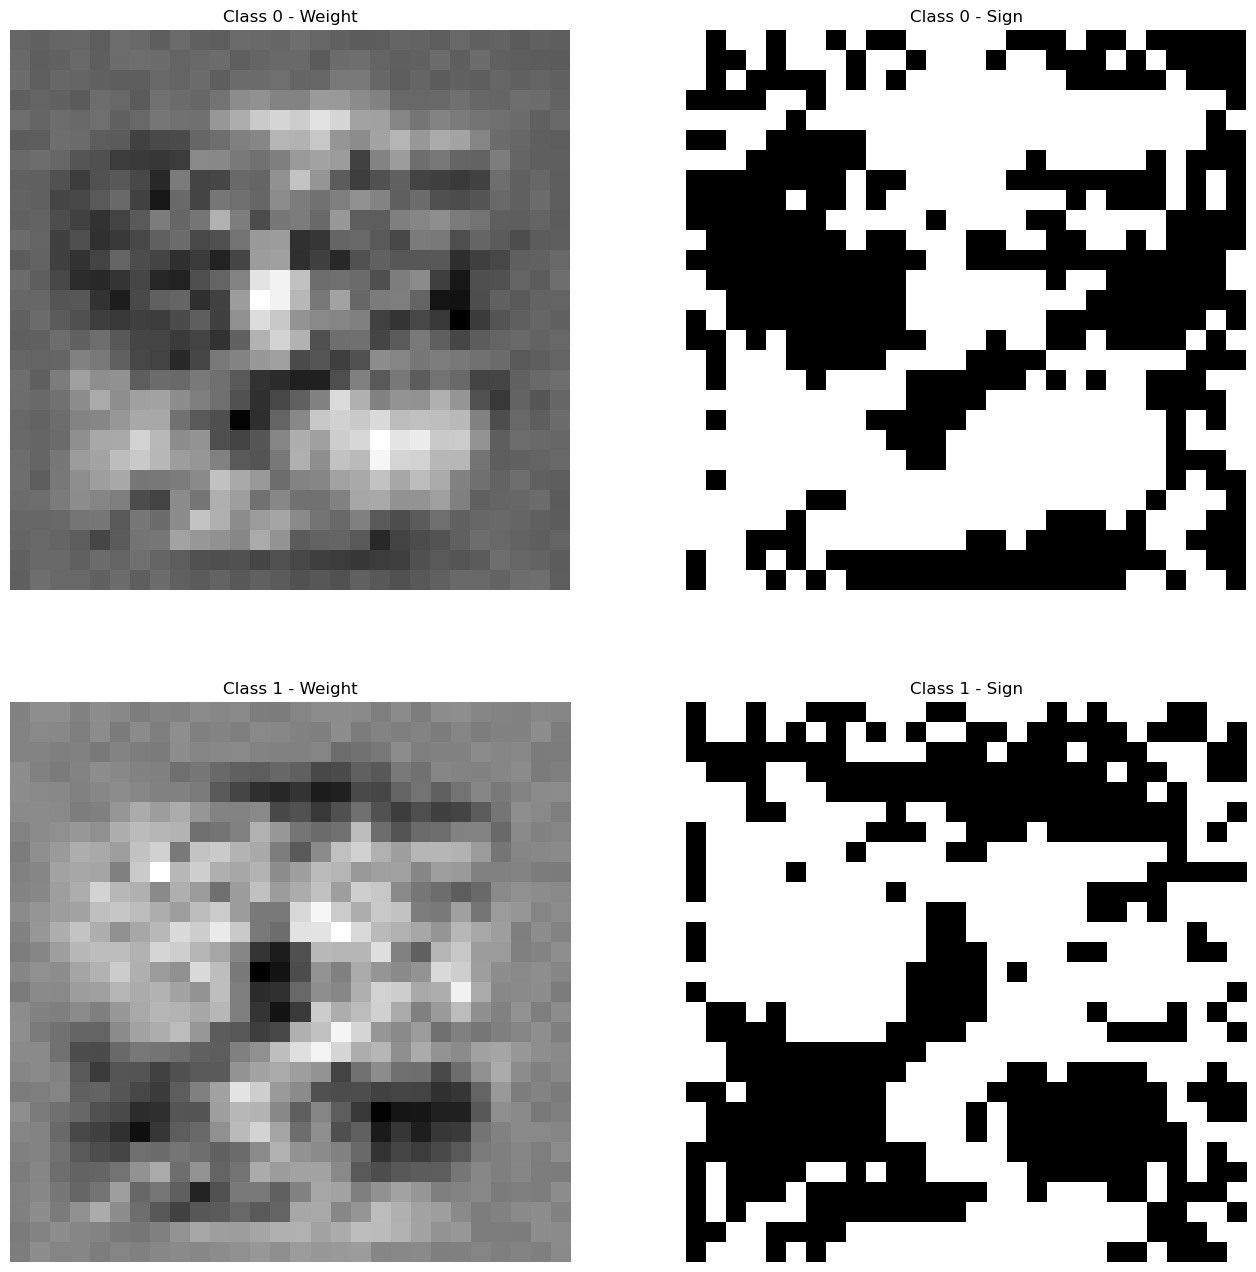

In [10]:

visualize_weights_and_signs(model_trained) # to visualize the weights and signs of the model

# 2\ Logistic regression Vs Adversarial

### Test set for original images

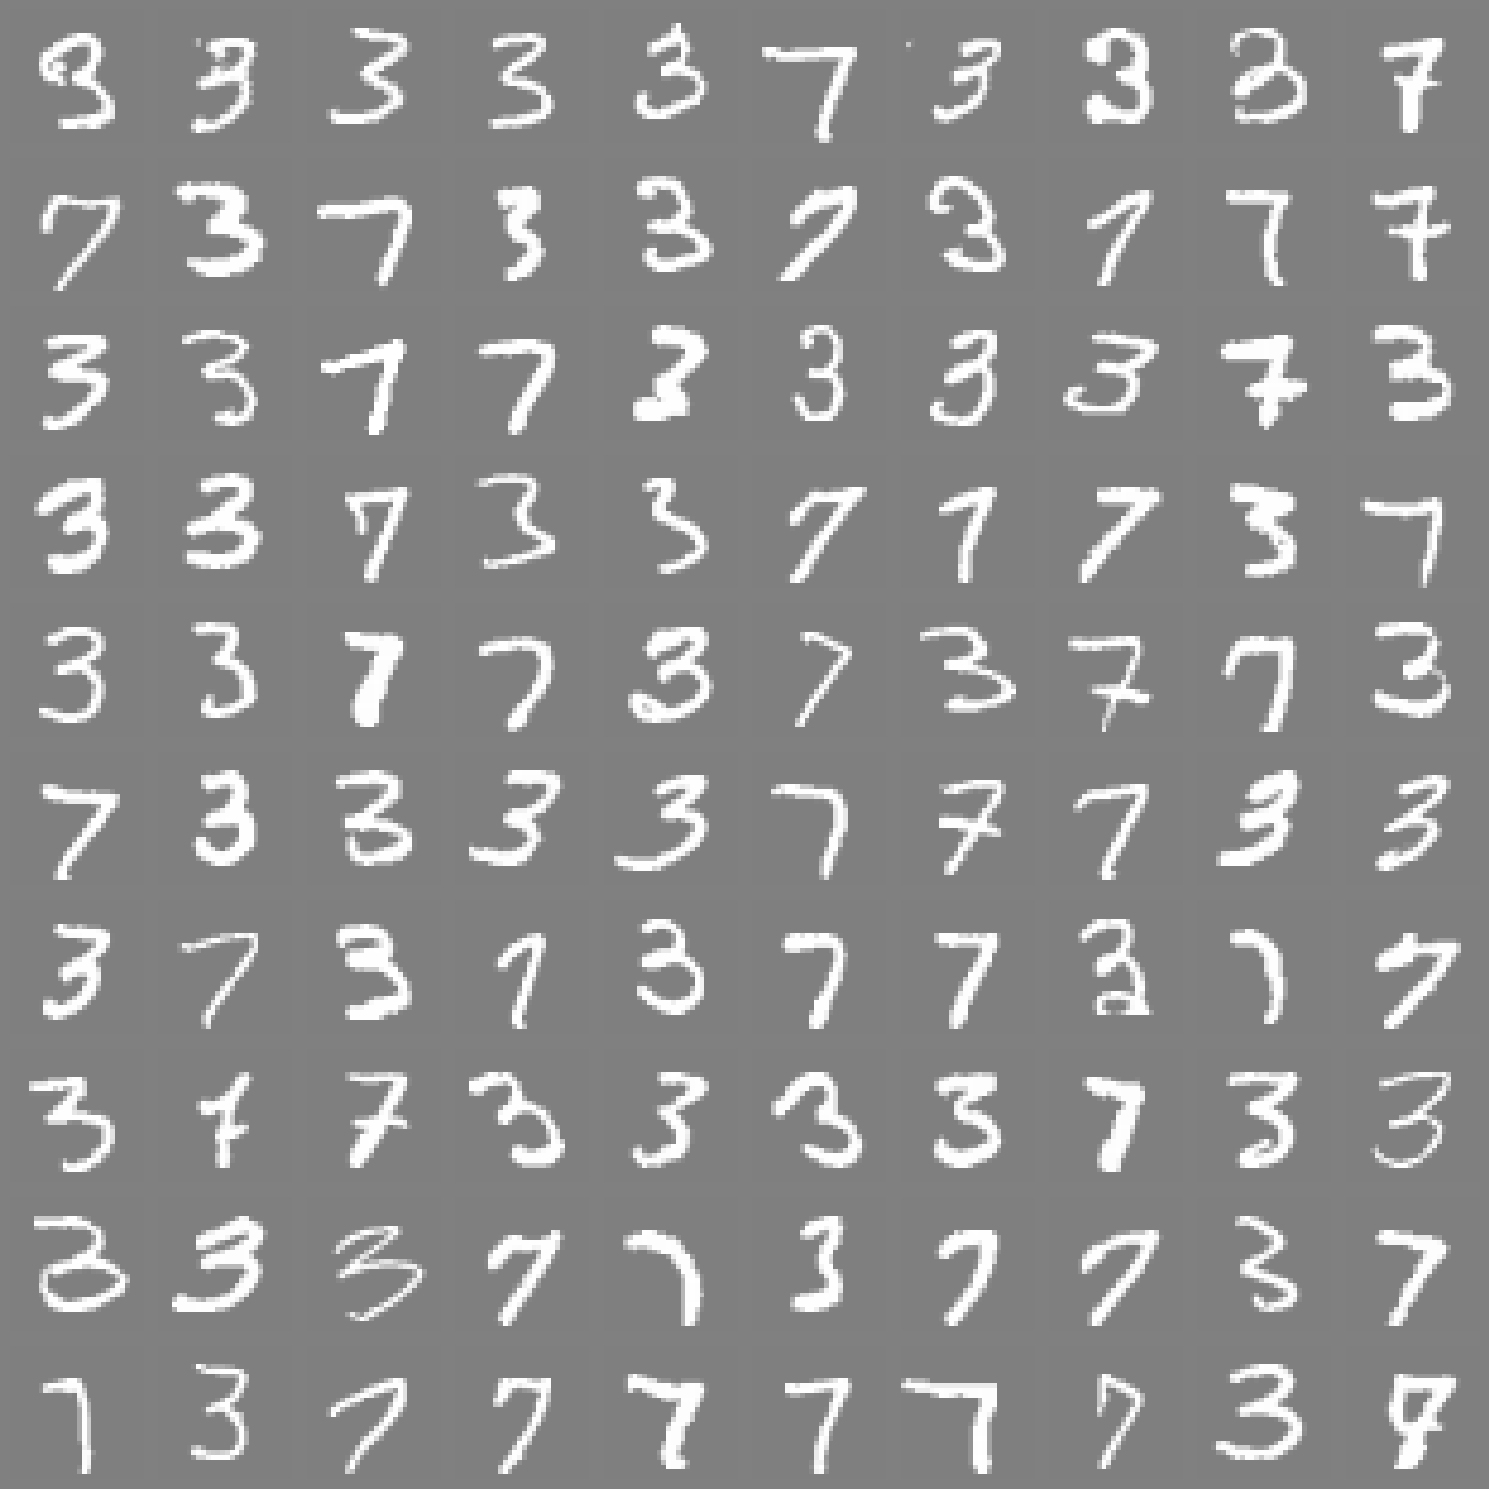

In [13]:

X_test_tensor2 = X_test_tensor.detach().numpy()
visualize_data(num_rows,num_cols,X_test_tensor2) # to visualize the test data

### Evaluation of the model on the unaltered test set

In [14]:
eval_test(X_test_tensor,y_test_tensor,model_trained) # to evaluate the model on the test set

Accuracy: 98.41%
Mean Confidence for All Examples: 0.9873
Mean Confidence for Incorrect Predictions: 0.8364


### Creation of the adversarial test set

In [15]:
eps = 0.25
X_test_tensor_adv = create_adv_test(model_trained,X_test_tensor,y_test_tensor,eps,criterion) # to create the adversarial test set

/home/spi-2019/Téléchargements/Tpworkspace/MLA_proj/adv_attack.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  alt_im_norm =torch.tensor(alt_im, dtype=torch.float32)


### Visualization of the altered test set 

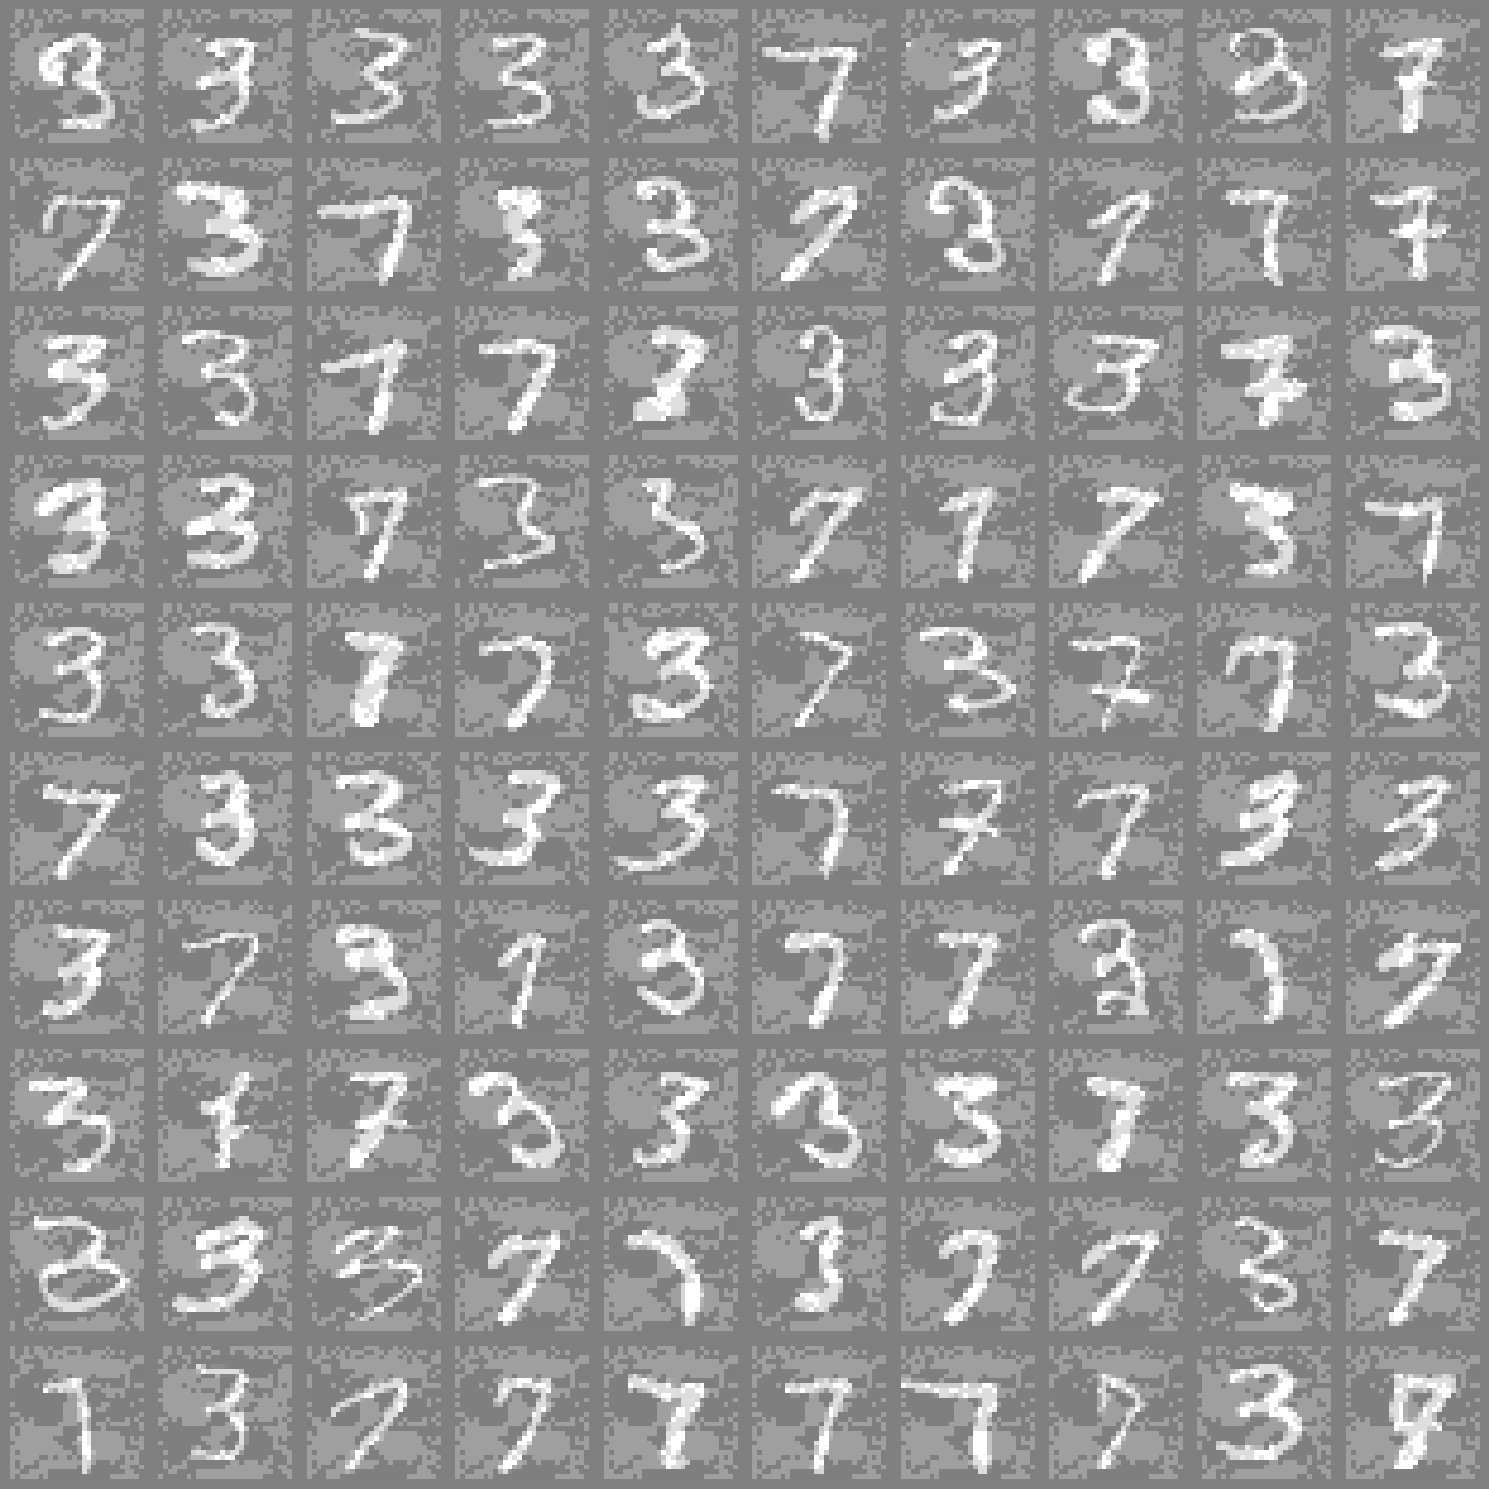

In [16]:
X_test_tensor_adv2 = X_test_tensor_adv.detach().numpy()
visualize_data(num_rows,num_cols,X_test_tensor_adv2) # to visualize the adversarial test set

### Evaluation of the model on the altered test set 

In [17]:
eval_test(X_test_tensor_adv,y_test_tensor,model_trained) # to evaluate the model on the adversarial test set

Accuracy: 0.14%
Mean Confidence for All Examples: 0.9961
Mean Confidence for Incorrect Predictions: 0.9961
